In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("penguins")
df.head()

print("Shape of dataset:", df.shape)
print("\nData Info\n")
df.info()
print("\nDescription\n", df.describe())

Shape of dataset: (344, 7)

Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

Description
        bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         3

In [3]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum()/len(df))*100
})
print(missing.sort_values(by='missing_percent', ascending=False))

# Fill missing values
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df.dropna(inplace=True)

# Duplicates
print('Duplicate rows:', df.duplicated().sum())

                   missing_count  missing_percent
sex                           11         3.197674
bill_depth_mm                  2         0.581395
bill_length_mm                 2         0.581395
flipper_length_mm              2         0.581395
body_mass_g                    2         0.581395
island                         0         0.000000
species                        0         0.000000
Duplicate rows: 0


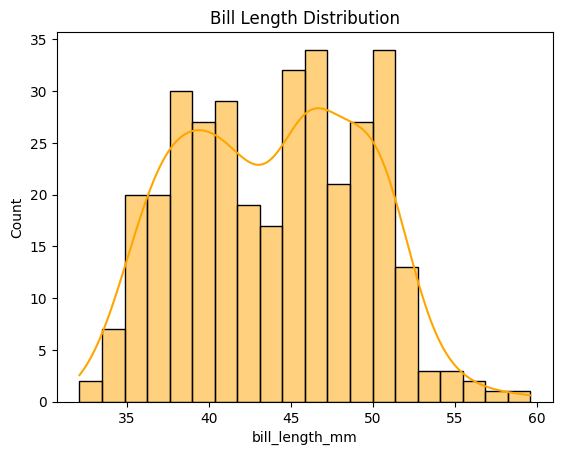

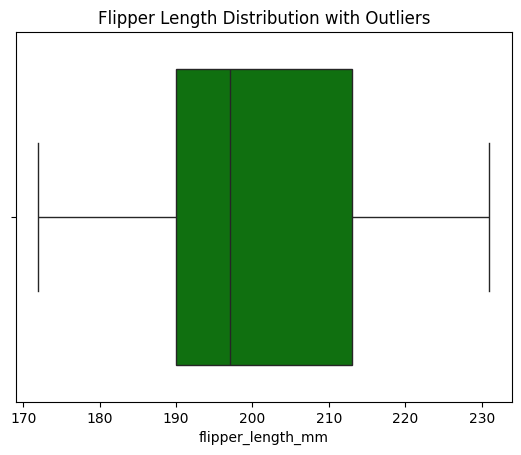

In [4]:
# Convert to category
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

# Univariate Analysis
nums = df.select_dtypes(include=['float64','int64']).columns
df[nums].describe()

sns.histplot(df['bill_length_mm'], bins=20, kde=True, color='orange')
plt.title('Bill Length Distribution')
plt.show()

sns.boxplot(x=df['flipper_length_mm'], color='green')
plt.title('Flipper Length Distribution with Outliers')
plt.show()


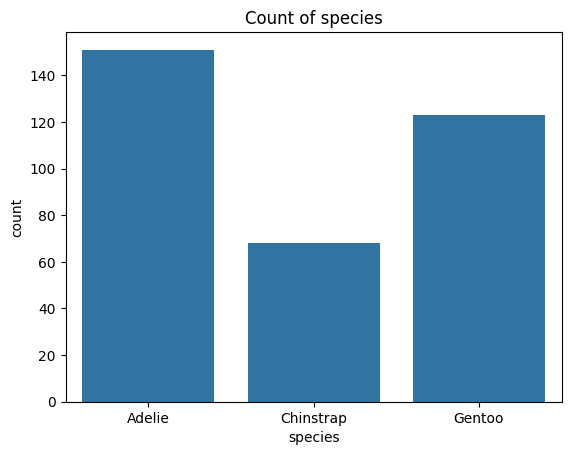

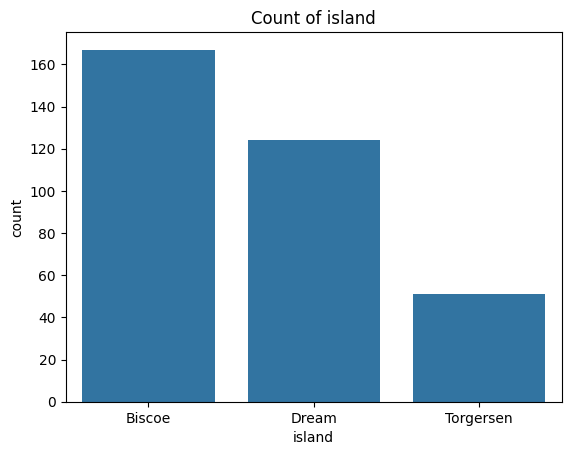

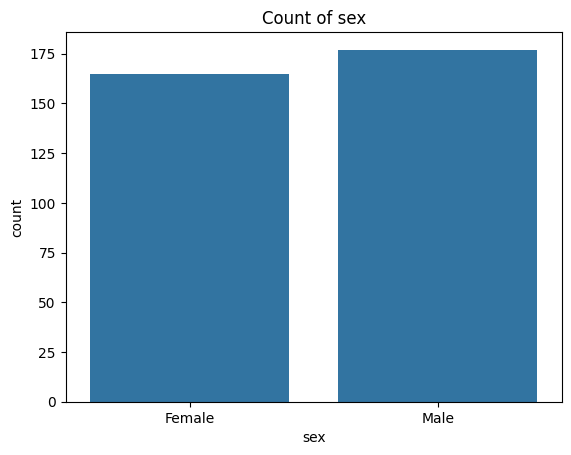

In [9]:
# Categorical features
for col in df.select_dtypes('category').columns:
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()



Outliers: 0


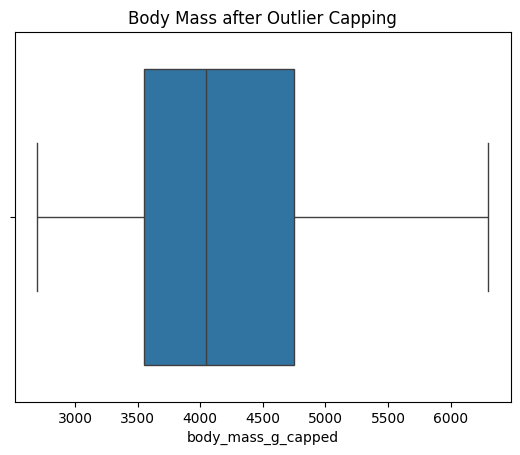

In [6]:

# Outlier Detection
Q1 = df['body_mass_g'].quantile(0.25)
Q3 = df['body_mass_g'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = df[(df['body_mass_g']<lower)|(df['body_mass_g']>upper)]
print("Outliers:", len(outliers))
df['body_mass_g_capped'] = df['body_mass_g'].clip(lower, upper)

sns.boxplot(x=df['body_mass_g_capped'])
plt.title("Body Mass after Outlier Capping")
plt.show()

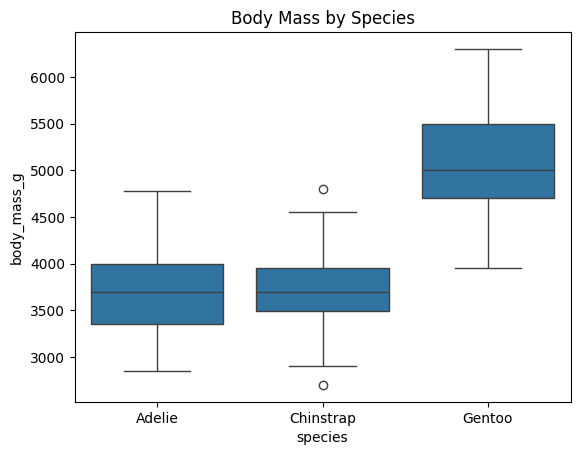

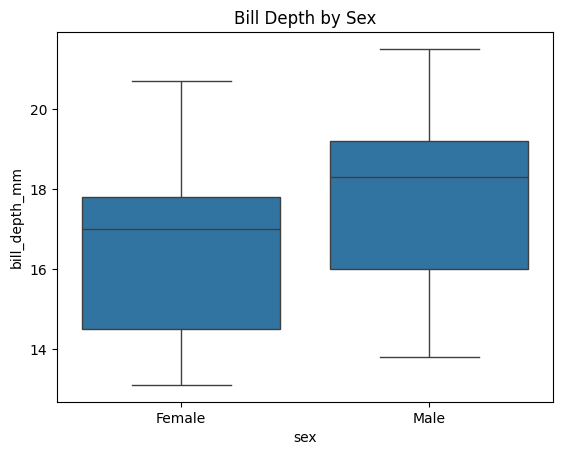

In [10]:
# Bivariate
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('Body Mass by Species')
plt.show()

sns.boxplot(x='sex', y='bill_depth_mm', data=df)
plt.title('Bill Depth by Sex')
plt.show()



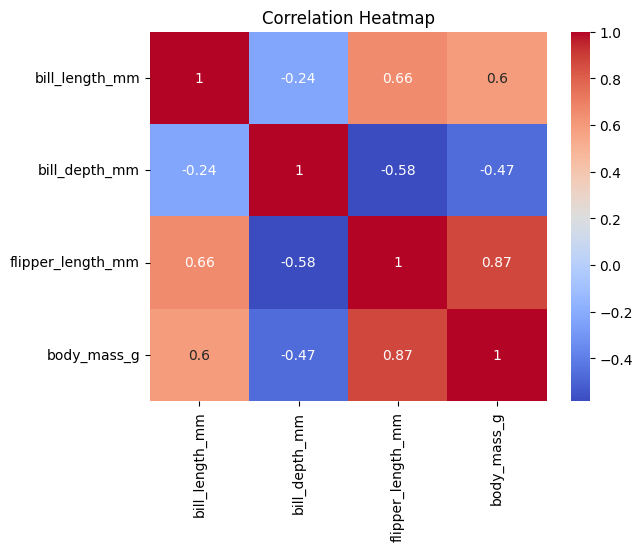

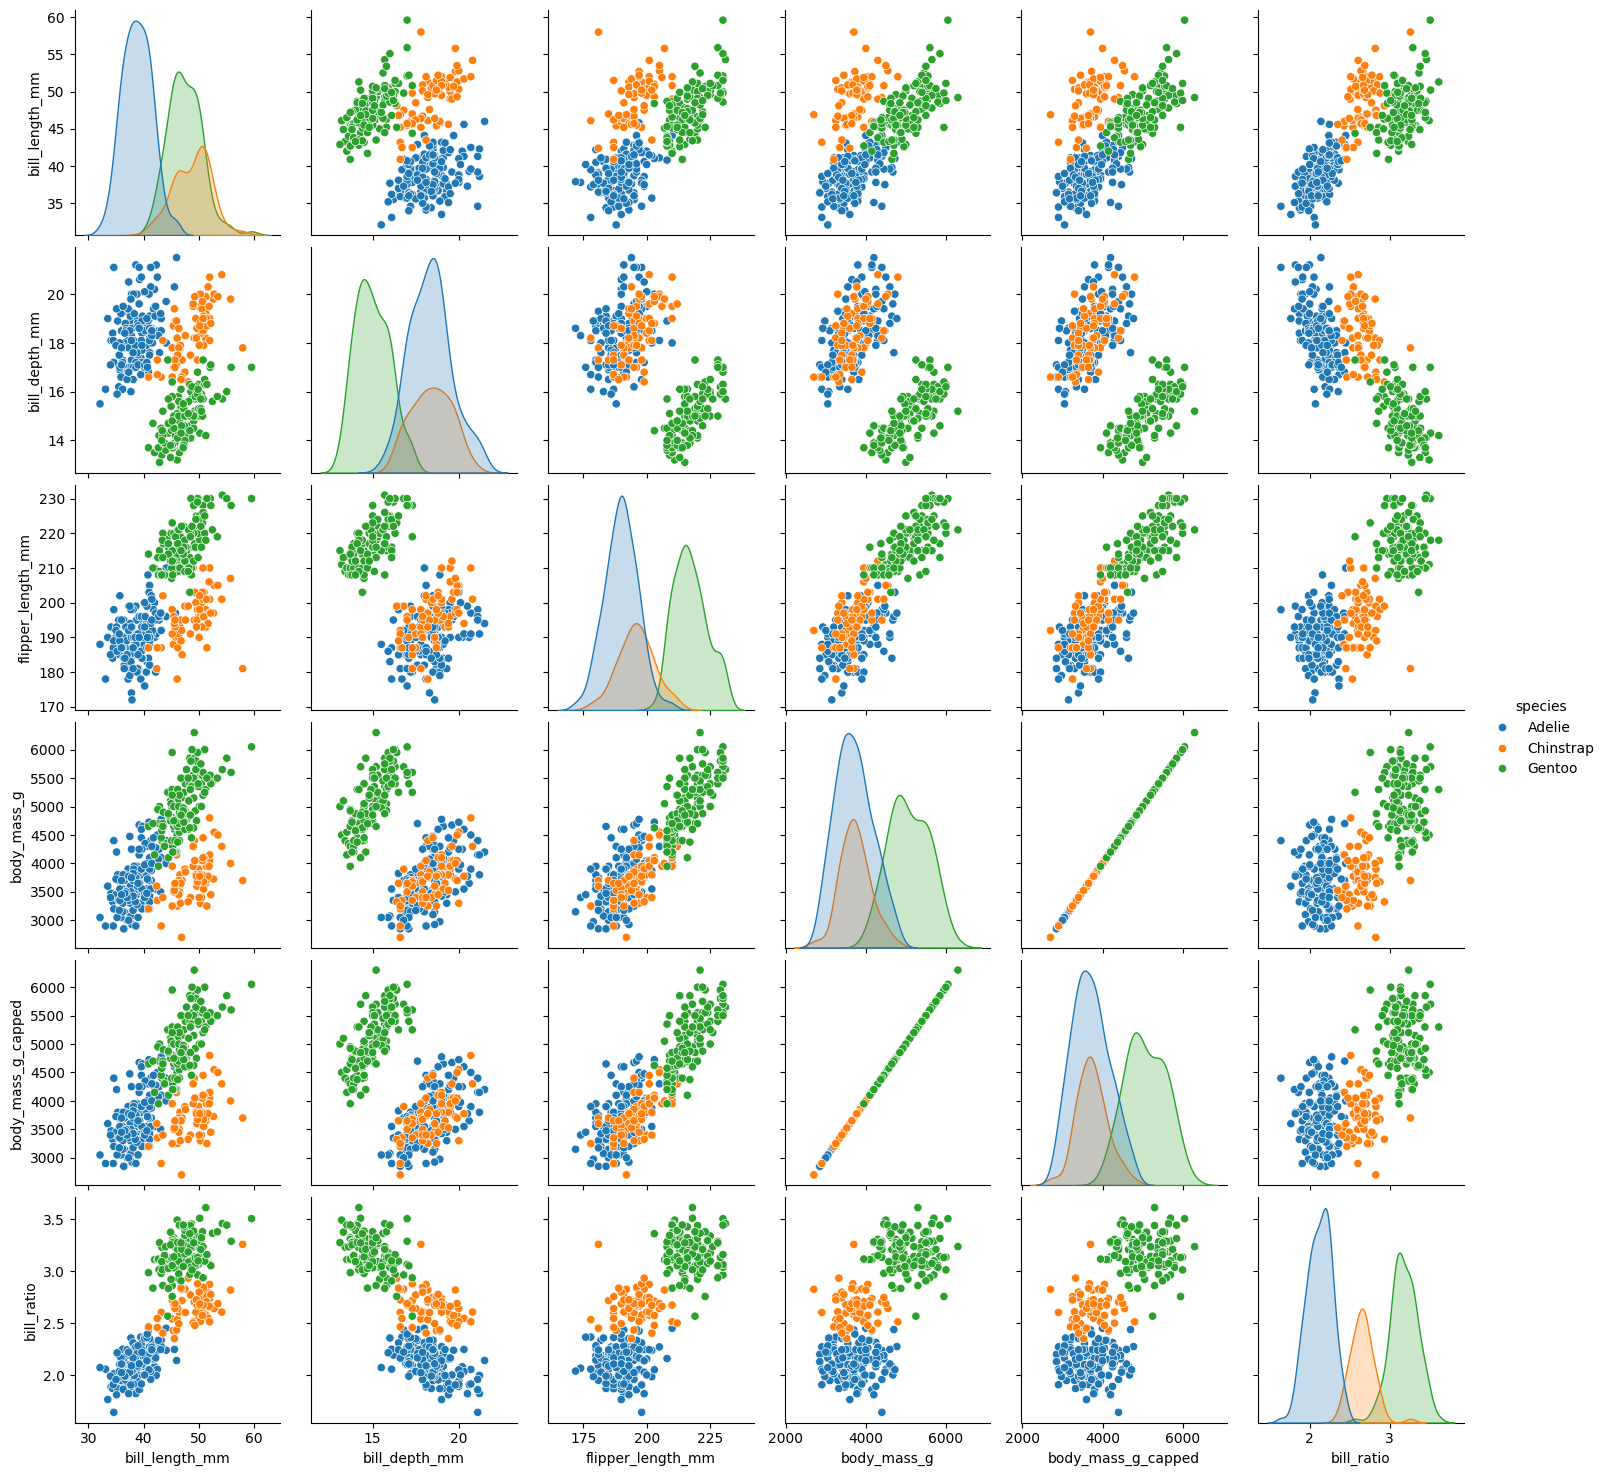

In [11]:
# Correlation
corr = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df, hue='species')
plt.show()

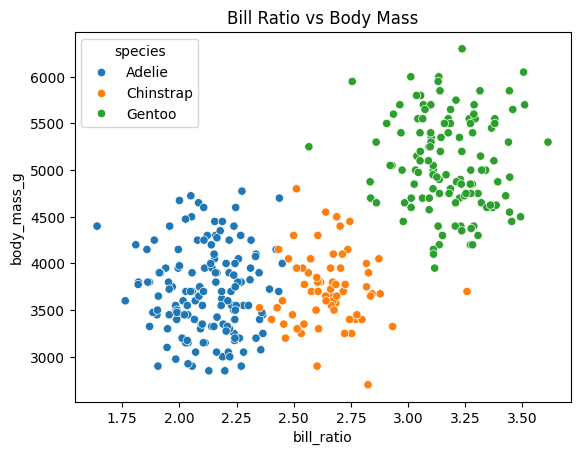

In [7]:
df['bill_ratio'] = df['bill_length_mm']/df['bill_depth_mm']
sns.scatterplot(x='bill_ratio', y='body_mass_g', hue='species', data=df)
plt.title('Bill Ratio vs Body Mass')
plt.show()

In [8]:
df.to_csv("Penguins_cleaned.csv", index=False)
print("Cleaned data saved as Penguins_cleaned.csv")


Cleaned data saved as Penguins_cleaned.csv
